# Problem Statement

Given a data set of handwritten digits, such as the one below, can we train a model to recognize the handwritten digit, that is, classify it as being one of the digits 0--9?

<img src="../figures/mnist.png" alt="Handwritten digits" style="width: 400px;" align="left"/>

Neural networks have been proven to be quite successful in solving image recognition problems. Let's start by training a simple neural network on this task. As we progress, we will build more complex features onto the network, hoping to increase the classification accuracy of our network.

Note that the problem at hand has been extensively studied and is quite often the benchmark problem for testing out new techniques in image recognition. The dataset is refered to as the MNIST (Mixed National Institute of Standards and Technology) database, and a simple google search will bring up a great deal of information about the problem. As of November 2016, the lowest classification error rate for the problem is 0.21 percent. This is only 0.02 percent better than the last record holder in 2012 at 0.23 percent [("Multi-column Deep Neural Networks for Image
Classification" by Cire&#x15F;an, Meier, and Schmidhuber)](http://repository.supsi.ch/5145/1/IDSIA-04-12.pdf)

# Set up

Let's import the necessary libraries and load the MNIST data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data and shuffle
import  mnist_loader3 as mnl
train, val, test = mnl.load_data_wrapper()
np.random.shuffle(train)
np.random.shuffle(test)

# Simple Network

In this section, we will train a simple feedforward neural network using stochastic gradient descent on the MNIST training data. There is no regularization implemented. The error/cost function is mean square error and the activation function is the sigmoid function. Here is a schematic diagram of the network we will use

<img src="../figures/mnist_network.png" alt="Schematic of MNIST Neural Network" style="width: 500px;" align="left"/>

In [3]:
import network_simple as network  # Implementation of our simple network

In [4]:
# Initialize and train the neural network
nn = network.Network([784, 30, 10])
iters = 20
train_cost, test_accuracy = nn.SGD(train, iters=iters, eta=0.05, test_data=test)
# Print the results
n_test = len(test)
for i in range(iters):
    print('Iter %*d:\t\t train cost = %f\t\t test accuracy = %d / %d' %
          (2, i+1, train_cost[i], test_accuracy[i], n_test))

Iter  1:		 train cost = 0.220980		 test accuracy = 6793 / 10000
Iter  2:		 train cost = 0.112883		 test accuracy = 8629 / 10000
Iter  3:		 train cost = 0.091284		 test accuracy = 8885 / 10000
Iter  4:		 train cost = 0.080395		 test accuracy = 9009 / 10000
Iter  5:		 train cost = 0.073737		 test accuracy = 9073 / 10000
Iter  6:		 train cost = 0.068827		 test accuracy = 9123 / 10000
Iter  7:		 train cost = 0.065188		 test accuracy = 9173 / 10000
Iter  8:		 train cost = 0.062374		 test accuracy = 9202 / 10000
Iter  9:		 train cost = 0.060284		 test accuracy = 9223 / 10000
Iter 10:		 train cost = 0.058336		 test accuracy = 9228 / 10000
Iter 11:		 train cost = 0.056565		 test accuracy = 9242 / 10000
Iter 12:		 train cost = 0.055033		 test accuracy = 9259 / 10000
Iter 13:		 train cost = 0.053694		 test accuracy = 9272 / 10000
Iter 14:		 train cost = 0.052483		 test accuracy = 9275 / 10000
Iter 15:		 train cost = 0.051334		 test accuracy = 9287 / 10000
Iter 16:		 train cost = 0.050215		 test 

(8000, 9800)

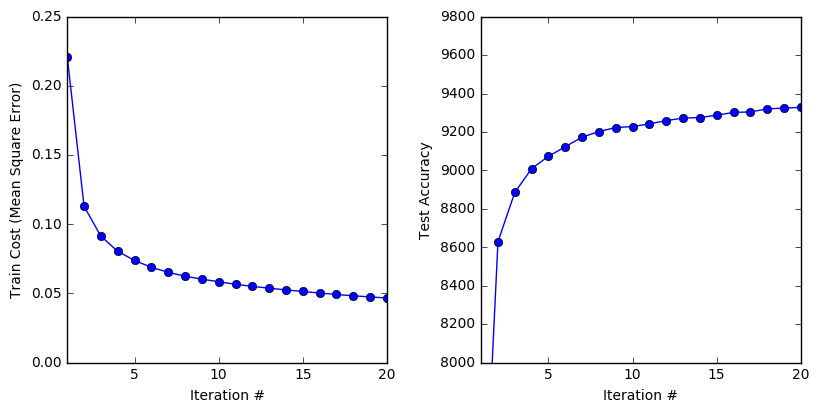

In [5]:
# Plot train cost and test accuracy
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
f.tight_layout(pad=1.0, w_pad=4.0, h_pad=1.0)
ax1.plot(range(1, iters+1), train_cost, '-o')
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Train Cost (Mean Square Error)')
ax1.set_xlim((1,iters))
ax2.plot(range(1, iters+1), test_accuracy, '-o')
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Test Accuracy')
ax2.set_xlim((1,iters))
ax2.set_ylim((8000, 9800))
#f.show()

# Cross Entropy Cost Function

Now we run alter the cost function of the network to use the cross-entropy cost function. This function causes a brief speedup in learning.

Cross entropy cost function:
$$
  E = -\dfrac{1}{m} \sum_{x}[y \ln(\hat{y}(x)) + (1-y) \ln(1-\hat{y}(x))]
$$

In [6]:
import network_simple2 as network2

In [7]:
# Initialize and train the neural network
nn = network2.Network([784, 30, 10])
iters = 20
train_cost, test_accuracy = nn.SGD(train, iters=iters, eta=0.05, test_data=test)
# Print the results
n_test = len(test)
for i in range(iters):
    print('Iter %*d:\t\t train cost = %f\t\t test accuracy = %d / %d' %
          (2, i+1, train_cost[i], test_accuracy[i], n_test))

Iter  1:		 train cost = 0.557923		 test accuracy = 9133 / 10000
Iter  2:		 train cost = 0.446195		 test accuracy = 9292 / 10000
Iter  3:		 train cost = 0.395179		 test accuracy = 9329 / 10000
Iter  4:		 train cost = 0.367178		 test accuracy = 9384 / 10000
Iter  5:		 train cost = 0.350014		 test accuracy = 9411 / 10000
Iter  6:		 train cost = 0.322896		 test accuracy = 9420 / 10000
Iter  7:		 train cost = 0.310426		 test accuracy = 9425 / 10000
Iter  8:		 train cost = 0.299941		 test accuracy = 9437 / 10000
Iter  9:		 train cost = 0.287650		 test accuracy = 9451 / 10000
Iter 10:		 train cost = 0.285224		 test accuracy = 9457 / 10000
Iter 11:		 train cost = 0.269919		 test accuracy = 9476 / 10000
Iter 12:		 train cost = 0.259812		 test accuracy = 9475 / 10000
Iter 13:		 train cost = 0.255614		 test accuracy = 9489 / 10000
Iter 14:		 train cost = 0.251118		 test accuracy = 9493 / 10000
Iter 15:		 train cost = 0.242140		 test accuracy = 9502 / 10000
Iter 16:		 train cost = 0.240924		 test 

(8000, 9800)

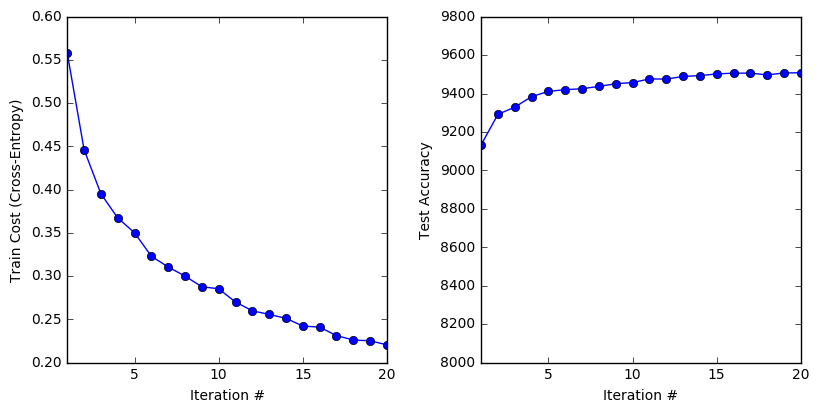

In [8]:
# Plot train cost and test accuracy
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
f.tight_layout(pad=1.0, w_pad=4.0, h_pad=1.0)
ax1.plot(range(1, iters+1), train_cost, '-o')
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Train Cost (Cross-Entropy)')
ax1.set_xlim((1,iters))
ax2.plot(range(1, iters+1), test_accuracy, '-o')
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Test Accuracy')
ax2.set_xlim((1,iters))
ax2.set_ylim((8000, 9800))

# $L_2$ Regularization

To avoid overfitting, we introduce a regularization term to the cost function, thereby requiring gradient descent to find smaller weights that minimize the cost. We will continue using cross-entropy but it is important to note that regularization may also be implemented with the mean square error cost function.

Cross-entropy cost function *plus regularization*:
$$
  E = -\dfrac{1}{m} \sum_{x}[y \ln(\hat{y}(x)) + (1-y) \ln(1-\hat{y}(x))] + \dfrac{\lambda}{2m} \sum_{w} w^2
$$

In [9]:
# Initialize and train the neural network
nn = network2.Network([784, 30, 10])
iters = 20
train_cost, test_accuracy = nn.SGD(train, iters=iters, eta=0.05, lmbda=5.0, test_data=test)
# Print the results
n_test = len(test)
for i in range(iters):
    print('Iter %*d:\t\t train cost = %f\t\t test accuracy = %d / %d' %
          (2, i+1, train_cost[i], test_accuracy[i], n_test))

Iter  1:		 train cost = 1.322672		 test accuracy = 9150 / 10000
Iter  2:		 train cost = 0.935244		 test accuracy = 9337 / 10000
Iter  3:		 train cost = 0.718776		 test accuracy = 9400 / 10000
Iter  4:		 train cost = 0.585850		 test accuracy = 9460 / 10000
Iter  5:		 train cost = 0.518778		 test accuracy = 9457 / 10000
Iter  6:		 train cost = 0.475248		 test accuracy = 9493 / 10000
Iter  7:		 train cost = 0.451035		 test accuracy = 9500 / 10000
Iter  8:		 train cost = 0.430285		 test accuracy = 9520 / 10000
Iter  9:		 train cost = 0.435949		 test accuracy = 9507 / 10000
Iter 10:		 train cost = 0.432519		 test accuracy = 9507 / 10000
Iter 11:		 train cost = 0.426066		 test accuracy = 9520 / 10000
Iter 12:		 train cost = 0.422982		 test accuracy = 9502 / 10000
Iter 13:		 train cost = 0.412481		 test accuracy = 9531 / 10000
Iter 14:		 train cost = 0.401097		 test accuracy = 9545 / 10000
Iter 15:		 train cost = 0.399151		 test accuracy = 9548 / 10000
Iter 16:		 train cost = 0.399258		 test 

(8000, 9800)

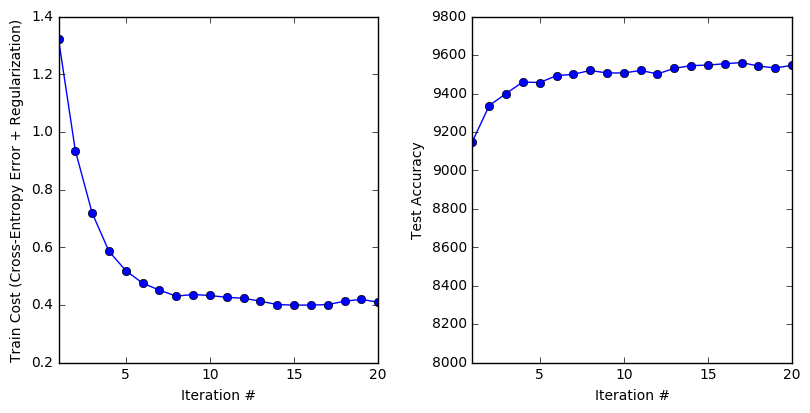

In [10]:
# Plot train cost and test accuracy
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
f.tight_layout(pad=1.0, w_pad=4.0, h_pad=1.0)
ax1.plot(range(1, iters+1), train_cost, '-o')
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Train Cost (Cross-Entropy Error + Regularization)')
ax1.set_xlim((1,iters))
ax2.plot(range(1, iters+1), test_accuracy, '-o')
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Test Accuracy')
ax2.set_xlim((1,iters))
ax2.set_ylim((8000, 9800))

# Mini-batch Stochastic Gradient Descent

Rather than updating the weights and biases according by subtracting the error of a single example (online learning), with mini-batch stochastic gradient descent we will update the weights and biases by the subtracting the error from a batch of training examples. 

With this method there is a give and take: learning speed vs. computational speed. Updating the weights and biases more often (with smaller batches) will increase the learning speed, but slow down the computational speed; conversely, updating the weights and biases less often (with bigger batches) will put a damper on the learning speed, but increase the computational speed.

In [11]:
import network_simple3 as network3

In [12]:
# Initialize and train the neural network
nn = network3.Network([784, 30, 10])
iters = 20
train_cost, test_accuracy = nn.SGD(train, iters=iters, eta=0.05, lmbda=5.0, batch_size=10, test_data=test)
# Print the results
n_test = len(test)
for i in range(iters):
    print('Iter %*d:\t\t train cost = %f\t\t test accuracy = %d / %d' %
          (2, i+1, train_cost[i], test_accuracy[i], n_test))

Iter  1:		 train cost = 1.725501		 test accuracy = 9161 / 10000
Iter  2:		 train cost = 1.598683		 test accuracy = 9265 / 10000
Iter  3:		 train cost = 1.529795		 test accuracy = 9325 / 10000
Iter  4:		 train cost = 1.455176		 test accuracy = 9355 / 10000
Iter  5:		 train cost = 1.382336		 test accuracy = 9421 / 10000
Iter  6:		 train cost = 1.343744		 test accuracy = 9455 / 10000
Iter  7:		 train cost = 1.307553		 test accuracy = 9456 / 10000
Iter  8:		 train cost = 1.262470		 test accuracy = 9464 / 10000
Iter  9:		 train cost = 1.238116		 test accuracy = 9474 / 10000
Iter 10:		 train cost = 1.202204		 test accuracy = 9493 / 10000
Iter 11:		 train cost = 1.154994		 test accuracy = 9541 / 10000
Iter 12:		 train cost = 1.130169		 test accuracy = 9537 / 10000
Iter 13:		 train cost = 1.124386		 test accuracy = 9519 / 10000
Iter 14:		 train cost = 1.105734		 test accuracy = 9515 / 10000
Iter 15:		 train cost = 1.084406		 test accuracy = 9510 / 10000
Iter 16:		 train cost = 1.057467		 test 

(8000, 9800)

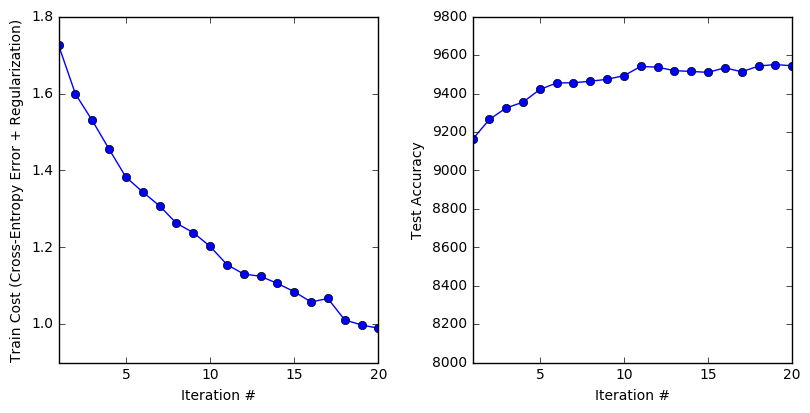

In [13]:
# Plot train cost and test accuracy
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
f.tight_layout(pad=1.0, w_pad=4.0, h_pad=1.0)
ax1.plot(range(1, iters+1), train_cost, '-o')
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Train Cost (Cross-Entropy Error + Regularization)')
ax1.set_xlim((1,iters))
ax2.plot(range(1, iters+1), test_accuracy, '-o')
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Test Accuracy')
ax2.set_xlim((1,iters))
ax2.set_ylim((8000, 9800))

The results above are not exactly an improvement. So why use mini-batch? As I mentioned above, the larger the mini-batch, the faster the *computational* speed. It may take us more iterations to train, but each iteration is faster. This could be helpful when training a network with a large number of iterations. Let's see the computation times for mini-batches of size 1 (online learning), 10, and 1000.

In [28]:
%%timeit nn = network3.Network([784, 30, 10]); iters = 5
train_cost, test_accuracy = nn.SGD(train, iters=iters, eta=0.05, lmbda=5.0)

1 loop, best of 3: 1min 15s per loop


In [29]:
%%timeit nn = network3.Network([784, 30, 10]); iters = 5
train_cost, test_accuracy = nn.SGD(train, iters=iters, eta=0.05, lmbda=5.0, batch_size=10)

1 loop, best of 3: 55.6 s per loop


# Proper Weight Initialization

Up untill this point we've been randomly initilializing our weights and biases according to a Gaussian distribution with mean 0 and variance 1. Such an initialization has the effect of making the neuron outputs very close to 0 or 1 (at least in the first few iterations), which has an negative effect on the speed in which the neuron learns the proper weights and biases.

The fix for this problem is to decrease the variance of the random initial weights. In particular, the variance of the weights going into layer $\ell$ should be inversely proportional to the number neurons in layer $\ell-1$. In other word, if $n^{\ell}_{\text{in}}$ is the number of neurons in layer $\ell-1$, that is, the number of neurons being input into layer $\ell$, then the weights in $w^\ell$ should be initialized with a variance $\sigma^2 = 1/n^\ell_{\text{in}}$.

In [17]:
# Initialize and train the neural network
nn = network3.Network([784, 30, 10], tight_weights=True)
iters = 20
train_cost, test_accuracy = nn.SGD(train, iters=iters, eta=0.05, lmbda=5.0, batch_size=10, test_data=test)
# Print the results
n_test = len(test)
for i in range(iters):
    print('Iter %*d:\t\t train cost = %f\t\t test accuracy = %d / %d' %
          (2, i+1, train_cost[i], test_accuracy[i], n_test))

Iter  1:		 train cost = 0.471694		 test accuracy = 9425 / 10000
Iter  2:		 train cost = 0.462322		 test accuracy = 9472 / 10000
Iter  3:		 train cost = 0.462016		 test accuracy = 9561 / 10000
Iter  4:		 train cost = 0.476775		 test accuracy = 9544 / 10000
Iter  5:		 train cost = 0.455137		 test accuracy = 9576 / 10000
Iter  6:		 train cost = 0.489889		 test accuracy = 9575 / 10000
Iter  7:		 train cost = 0.494631		 test accuracy = 9585 / 10000
Iter  8:		 train cost = 0.500288		 test accuracy = 9598 / 10000
Iter  9:		 train cost = 0.523355		 test accuracy = 9585 / 10000
Iter 10:		 train cost = 0.536109		 test accuracy = 9600 / 10000
Iter 11:		 train cost = 0.546726		 test accuracy = 9578 / 10000
Iter 12:		 train cost = 0.552270		 test accuracy = 9586 / 10000
Iter 13:		 train cost = 0.554443		 test accuracy = 9590 / 10000
Iter 14:		 train cost = 0.580072		 test accuracy = 9588 / 10000
Iter 15:		 train cost = 0.575770		 test accuracy = 9563 / 10000
Iter 16:		 train cost = 0.607559		 test 

(8000, 9800)

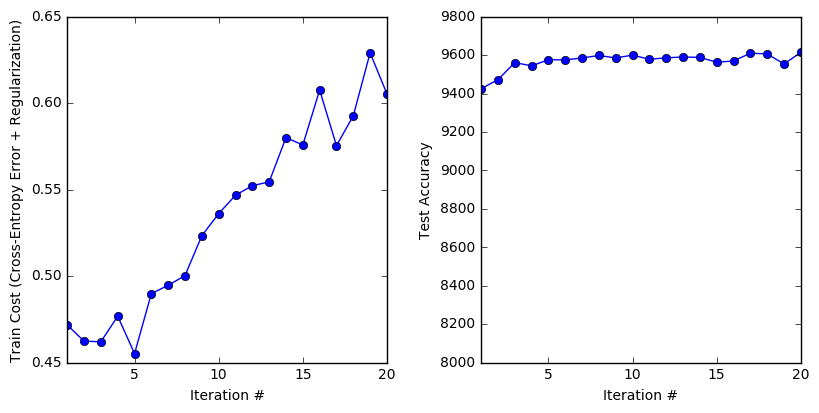

In [18]:
# Plot train cost and test accuracy
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
f.tight_layout(pad=1.0, w_pad=4.0, h_pad=1.0)
ax1.plot(range(1, iters+1), train_cost, '-o')
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Train Cost (Cross-Entropy Error + Regularization)')
ax1.set_xlim((1,iters))
ax2.plot(range(1, iters+1), test_accuracy, '-o')
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Test Accuracy')
ax2.set_xlim((1,iters))
ax2.set_ylim((8000, 9800))

# Experimentation

Let's run some experiments on networks with more neurons or more layers trained for more iterations than we have done previously.

First let's try a network with a single hidden layer containing 100 neurons and train it for 70 iterations. Otherwise, the hyperparameters are exactly the same as what appears above.

In [19]:
# Initialize and train the neural network
nn = network3.Network([784, 100, 10], tight_weights=True)
iters = 70
train_cost, test_accuracy = nn.SGD(train, iters=iters, eta=0.05, lmbda=5.0, batch_size=10, test_data=test)
# Print the results
n_test = len(test)
for i in range(iters):
    print('Iter %*d:\t\t train cost = %f\t\t test accuracy = %d / %d' %
          (2, i+1, train_cost[i], test_accuracy[i], n_test))

Iter  1:		 train cost = 0.438366		 test accuracy = 9494 / 10000
Iter  2:		 train cost = 0.369236		 test accuracy = 9640 / 10000
Iter  3:		 train cost = 0.328778		 test accuracy = 9723 / 10000
Iter  4:		 train cost = 0.349621		 test accuracy = 9715 / 10000
Iter  5:		 train cost = 0.350957		 test accuracy = 9760 / 10000
Iter  6:		 train cost = 0.366080		 test accuracy = 9758 / 10000
Iter  7:		 train cost = 0.376725		 test accuracy = 9764 / 10000
Iter  8:		 train cost = 0.380780		 test accuracy = 9757 / 10000
Iter  9:		 train cost = 0.395493		 test accuracy = 9774 / 10000
Iter 10:		 train cost = 0.412892		 test accuracy = 9770 / 10000
Iter 11:		 train cost = 0.414478		 test accuracy = 9767 / 10000
Iter 12:		 train cost = 0.419493		 test accuracy = 9771 / 10000
Iter 13:		 train cost = 0.426901		 test accuracy = 9767 / 10000
Iter 14:		 train cost = 0.426639		 test accuracy = 9785 / 10000
Iter 15:		 train cost = 0.431717		 test accuracy = 9776 / 10000
Iter 16:		 train cost = 0.435859		 test 

(8000, 9800)

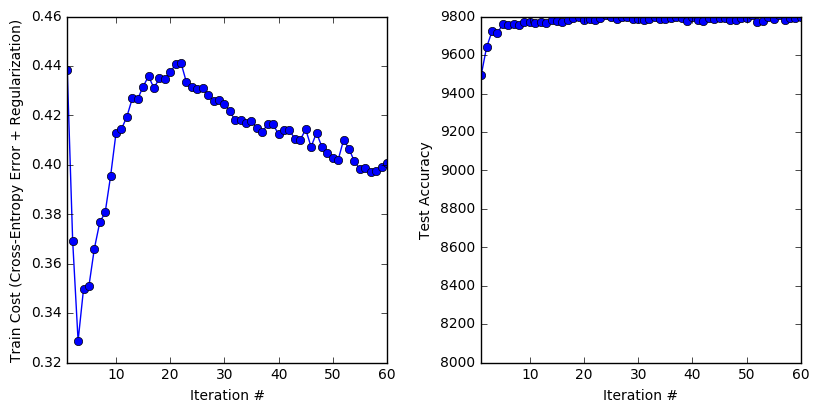

In [20]:
# Plot train cost and test accuracy
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
f.tight_layout(pad=1.0, w_pad=4.0, h_pad=1.0)
ax1.plot(range(1, iters+1), train_cost, '-o')
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Train Cost (Cross-Entropy Error + Regularization)')
ax1.set_xlim((1,iters))
ax2.plot(range(1, iters+1), test_accuracy, '-o')
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Test Accuracy')
ax2.set_xlim((1,iters))
ax2.set_ylim((8000, 9800))

Let's see if we can do better by adding an extra hidden layer with 100 neurons. We will train it on 200 iterations.

Note that this network has $(784 \times 100) + (100 \times 100) + (100 \times 10) + 210 = 89,610$ parameters!

In [21]:
# Initialize and train the neural network
nn = network3.Network([784, 100, 100, 10], tight_weights=True)
iters = 200
train_cost, test_accuracy = nn.SGD(train, iters=iters, eta=0.05, lmbda=5.0, batch_size=10, test_data=test, 
                                   verbose=True)
# Print the results
n_test = len(test)
for i in range(iters):
    print('Iter %*d:\t\t train cost = %f\t\t test accuracy = %d / %d' %
          (2, i+1, train_cost[i], test_accuracy[i], n_test))

Network trained on 1 iterations.
Network trained on 2 iterations.
Network trained on 3 iterations.
Network trained on 4 iterations.
Network trained on 5 iterations.
Network trained on 6 iterations.
Network trained on 7 iterations.
Network trained on 8 iterations.
Network trained on 9 iterations.
Network trained on 10 iterations.
Network trained on 11 iterations.
Network trained on 12 iterations.
Network trained on 13 iterations.
Network trained on 14 iterations.
Network trained on 15 iterations.
Network trained on 16 iterations.
Network trained on 17 iterations.
Network trained on 18 iterations.
Network trained on 19 iterations.
Network trained on 20 iterations.
Network trained on 21 iterations.
Network trained on 22 iterations.
Network trained on 23 iterations.
Network trained on 24 iterations.
Network trained on 25 iterations.
Network trained on 26 iterations.
Network trained on 27 iterations.
Network trained on 28 iterations.
Network trained on 29 iterations.
Network trained on 30 i

(8000, 9900)

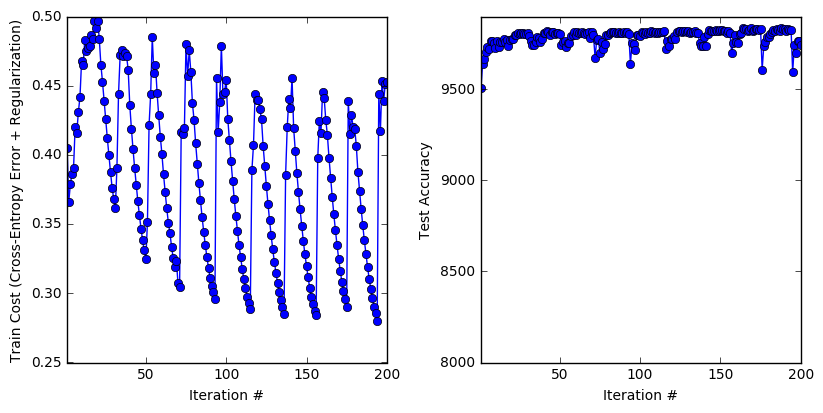

In [22]:
# Plot train cost and test accuracy
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
f.tight_layout(pad=1.0, w_pad=4.0, h_pad=1.0)
ax1.plot(range(1, iters+1), train_cost, '-o')
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Train Cost (Cross-Entropy Error + Regularization)')
ax1.set_xlim((1,iters))
ax2.plot(range(1, iters+1), test_accuracy, '-o')
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Test Accuracy')
ax2.set_xlim((1,iters))
ax2.set_ylim((8000, 9900))

We see in the last two graphs, that there was lots of jumps in the training cost and test accuracy. These jumps are due to the learning rate being too large as we approach the minimum, and in that respect, we large learning rate caused us to step over the minimum!

One fix for this probelm is to update the learning rate based on the current number of iterations. Let's consider a learning schedule $\eta = 1/(0.5*iters + 10)$. Also, we will not use a set number of iterations, but instead, we will stop when no improvements have been seen in 50 iterations.

In [23]:
import network_simple4 as network4

In [24]:
# Initialize and train the neural network
nn = network4.Network([784, 100, 100, 10], tight_weights=True, schedule_learning=True)
train_cost, test_accuracy = nn.SGD(train, eta_inv=10, lmbda=5.0, batch_size=10, no_improvement_stop=50, 
                                   test_data=val, verbose=True)
# Print the results
print('Max validation accuracy was: %f%%' % (max(test_accuracy)/len(val)*100))
print('Evaluation on test data  is: %f%%' % (nn.evaluate(test)/len(test)*100))

Network trained on 10 iterations.
Network trained on 20 iterations.
Network trained on 30 iterations.
Network trained on 40 iterations.
Network trained on 50 iterations.
Network trained on 60 iterations.
Network trained on 70 iterations.
Network trained on 80 iterations.
Network trained on 90 iterations.
Network trained on 100 iterations.
Network trained on 110 iterations.
Network trained on 120 iterations.
Network trained on 130 iterations.
Network trained on 140 iterations.
Network trained on 150 iterations.
Network trained on 160 iterations.
Network trained on 170 iterations.
Network trained on 180 iterations.
Network trained on 190 iterations.
Max validation accuracy was: 98.140000%
Evaluation on test data  is: 98.120000%


(8000, 9900)

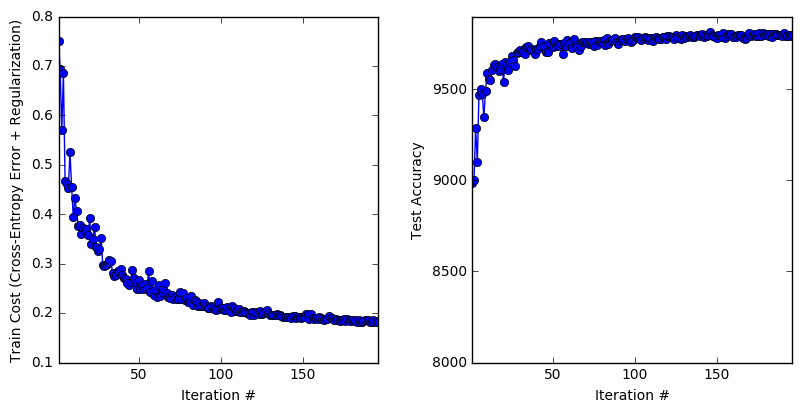

In [27]:
# Plot train cost and test accuracy
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
f.tight_layout(pad=1.0, w_pad=4.0, h_pad=1.0)
iters = len(train_cost)
ax1.plot(range(1, iters+1), train_cost, '-o')
ax1.set_xlabel('Iteration #')
ax1.set_ylabel('Train Cost (Cross-Entropy Error + Regularization)')
ax1.set_xlim((1,iters))
ax2.plot(range(1, iters+1), test_accuracy, '-o')
ax2.set_xlabel('Iteration #')
ax2.set_ylabel('Test Accuracy')
ax2.set_xlim((1,iters))
ax2.set_ylim((8000, 9900))

### Reference

Some ideas here (as well as some of the images) were taken from Michael Nielsen's free online text, ["Neural Networks and Deep Learning"](http://neuralnetworksanddeeplearning.com/).